<a href="https://colab.research.google.com/github/yyoshiaki/2019SpringCamp_GP/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

様々な初期化

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
np.set_printoptions (precision=4,suppress=True)

データファイルの準備

In [0]:
! wget http://chasen.org/~daiti-m/gpbook/data/gpr-data.zip
! unzip -j -o gpr-data.zip

--2019-03-10 23:03:46--  http://chasen.org/~daiti-m/gpbook/data/gpr-data.zip
Resolving chasen.org (chasen.org)... 160.16.121.64
Connecting to chasen.org (chasen.org)|160.16.121.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304811 (298K) [application/zip]
Saving to: ‘gpr-data.zip.2’

gpr-data.zip.2      100%[===================>] 297.67K   478KB/s    in 0.6s    

2019-03-10 23:03:47 (478 KB/s) - ‘gpr-data.zip.2’ saved [304811/304811]

Archive:  gpr-data.zip
  inflating: crimes.data.txt         
  inflating: crimes.names.txt        
  inflating: forest-fires.csv        
  inflating: forest-fires.names      
  inflating: forest.dat              
  inflating: gpr.dat                 
  inflating: mauna-loa.dat           
 extracting: simple1.dat             
  inflating: simple2.dat             


In [0]:
ydef lm (X):
  N = len(X)
  y = X[:,0]
  X = np.vstack([np.ones(N),X[:,1]]).T
  w = inv(X.T.dot(X)).dot(X.T).dot(y)
  return w

In [0]:
def lm_plot (X):
  xmin,xmax = -5,5
  ymin,ymax = -5,5
  simple_plot (X)
  w = lm (X)
  M = 20
  xx = linspace(xmin,xmax,M)
  yy =[w[0]+w[1]*x for x in xx]
  plt.plot (xx,yy)
  gca().set_aspect(1)
  print (w)

In [0]:
def simple_plot (X):
  xmin,xmax = -5,5
  ymin,ymax = -5,5
  plt.scatter(X[:,1],X[:,0],marker='x',s=80)
  plt.plot([xmin,xmax],[0,0],'k',linewidth=1)
  plt.plot([0,0],[ymin,ymax],'k',linewidth=1)
  plt.axis([xmin,xmax,ymin,ymax])

In [0]:
X = np.loadtxt('simple1.dat')
print (X)

[[ 2.  3.]
 [ 4.  2.]
 [ 1. -1.]]


[1.7692 0.4231]


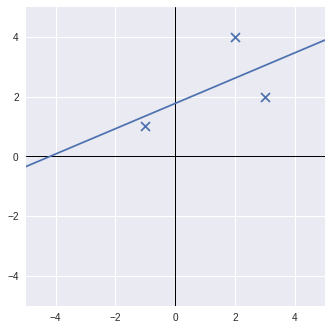

In [0]:
lm_plot (X)

[1.3721 0.5698]


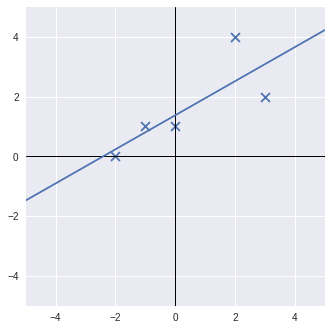

In [0]:
X2 = np.loadtxt('simple2.dat')
lm_plot (X2)

予測してみる

In [0]:
def lm_predict (x,w):
  yhat = w[0]+w[1]*x
  return yhat
def lm_error (x,y,w):
  yhat = lm_predict (x,w)
  return (y - yhat)**2
def lm_errors (X,w):
  return [lm_error(x[0],x[1],w) for x in X]
def lm_mse (X,w):
  errors = lm_errors(X,w)
  print (mean(errors))


In [0]:
w = lm (X)
print (w)

[1.7692 0.4231]


In [0]:
lm_error (2,2,w)

0.3786982248520716

In [0]:
lm_errors (X2,w)

array([ 0.1479,  2.1361, 10.1908, 14.2071,  4.8062])

In [0]:
lm_mse (X2,w)

6.297633136094676


In [0]:
hawaii = np.loadtxt('mauna-loa.dat')
print (hawaii)

[[1958.2027  315.7   ]
 [1958.2877  317.45  ]
 [1958.3699  317.51  ]
 ...
 [2018.9562  409.23  ]
 [2019.0411  410.92  ]
 [2019.126   411.66  ]]


In [0]:
mean(hawaii[:,0])

1988.8477264099038

In [0]:
X3=np.vstack((hawaii[:,1]-mean(hawaii[:,1]),hawaii[:,0]-mean(hawaii[:,0])))

In [0]:
print(X3)

[[-38.5117 -36.7617 -36.7017 ...  55.0183  56.7083  57.4483]
 [-30.645  -30.56   -30.4778 ...  30.1085  30.1934  30.2783]]


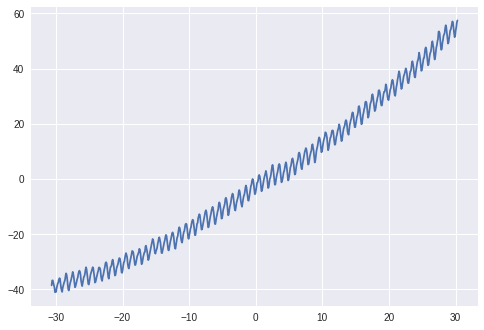

In [0]:
plt.plot(X3[1],X3[0])

[8.1197 1.2685]


[-40, 40, -40, 40]

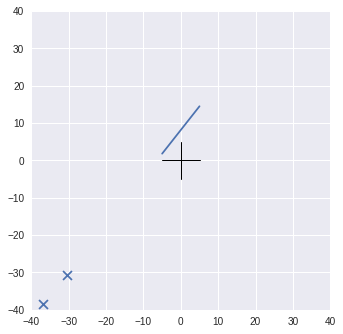

In [0]:
lm_plot(X3)
axis([-40,40,-40,40])

In [0]:
! cat gpr.dat

-0.5	0.7
0.5	1.8
1	1.7
1.4	2.3
3	1
2.3	0
2.5	0.2
1.5	2
1.1	2.4
0.7	1.5


In [0]:
! cat simple1.dat

2	3
4	2
1	-1
